In [1]:
import os
import sys

import numpy as np
import pandas as pd
import xarray as xr

In [2]:
## Import relevant paths

notebook_path=os.getcwd()
##### -----> check the path dependencies existent here for the airborne_importer path to access the bahamas dataset
#%% Predefining all paths to take scripts and data from and where to store
actual_working_path=os.getcwd()+"/../../Synthetic_Airborne_Arctic_ARs/"

os.chdir(actual_working_path+"/config/")
import init_paths
import data_config
working_path=init_paths.main()
airborne_importer_path=actual_working_path+"/../hamp_processing_python/"
    
airborne_data_importer_path=working_path+"/Work/GIT_Repository/"
manuscript_path=airborne_data_importer_path+"/../HAMP_Arctic_Paper/Manuscript/Paper_Plots/"
unified_processing_path=airborne_data_importer_path+"/hamp_processing_py/hamp_processing_python/"

airborne_script_module_path=actual_working_path+"/scripts/"
airborne_processing_module_path=actual_working_path+"/src/"
airborne_plotting_module_path=actual_working_path+"/plotting/"
os.chdir(airborne_processing_module_path)

sys.path.insert(6,airborne_script_module_path)
sys.path.insert(5,airborne_processing_module_path)
sys.path.insert(4,airborne_plotting_module_path)
sys.path.insert(3,unified_processing_path)
sys.path.insert(2,airborne_importer_path)
sys.path.insert(1,airborne_importer_path+"/src/")
#print(sys.path)

In [3]:
use_amsr2_sea_ice=True
#draw_multibox=True

def extract_and_add_date(file):
    date=date=file[-16:-8]
    grid_time = pd.to_datetime(date)
    return ds.assign(time=grid_time)

def add_time_dim(xda):
    from datetime import datetime
    xda = xda.expand_dims(time = [datetime.now()])
    return xda    


if use_amsr2_sea_ice:
    amsr2_sea_ice_path="C:\\Users\\u300737\\Desktop\\PhD_UHH_WIMI\\Work\\GIT_Repository\\hamp_processing_py\\hamp_processing_python\\Flight_Data\\HALO_AC3\\sea_ice\\"
    import glob
    sea_ice_file_list=glob.glob(amsr2_sea_ice_path+"*.nc")
    file_date_str_list=[file[-16:-8] for file in sea_ice_file_list]
    sea_ice_ds=xr.open_mfdataset(sea_ice_file_list,combine="nested",
                       concat_dim='time',
                       preprocess=add_time_dim)
    
    #from datetime import datetime
    sea_ice_ds["lon"]=sea_ice_ds["lon"][0,:,:]
    file_dates=pd.DatetimeIndex(file_date_str_list)
    sea_ice=sea_ice_ds["seaice"].mean(dim="time").compute()
    sea_ice_ds

C:\Users\u300737\Anaconda3\lib\site-packages\dask\array\numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


In [4]:
import quicklook_dicts as Quicklook_Dicts
import measurement_instruments_ql as Measurement_Instruments_QL
#import campaign_netcdf
campaign="HALO_AC3"
flight="RF01"
date="20220311"
flight_day=None
campaign_path=unified_processing_path+"/Flight_Data/"+campaign+"/"
print(campaign_path)
prcs_cfg_dict=Quicklook_Dicts.get_prcs_cfg_dict(flight, date, campaign,
                                                    campaign_path,
                                                    additional_entries_dict={})
if flight_day!=None:
    prcs_cfg_dict["FD"]=flight_day
# Data Handling 
datasets_dict, data_reader_dict=Quicklook_Dicts.get_data_handling_attr_dicts(
        entries_to_change={})

# Get Plotting Handling
plot_handler_dict, plot_cls_args_dict,plot_fct_args_dict=\
                                    Quicklook_Dicts.get_plotting_handling_attrs_dict(
                                        entries_to_change={})
                                    
HALO_Devices_cls=Measurement_Instruments_QL.HALO_Devices(prcs_cfg_dict)
POLAR_Devices_cls=Measurement_Instruments_QL.POLAR_Devices(prcs_cfg_dict)
POLAR_GPS_INS_cls=Measurement_Instruments_QL.GPS_INS(POLAR_Devices_cls)

C:\Users\u300737\Desktop\PhD_UHH_WIMI\/Work/GIT_Repository//hamp_processing_py/hamp_processing_python//Flight_Data/HALO_AC3/


In [5]:
prcs_cfg_dict
BAHAMAS_cls=Measurement_Instruments_QL.BAHAMAS(HALO_Devices_cls)
RADAR_cls=Measurement_Instruments_QL.RADAR(HALO_Devices_cls)
#campaign_nc=campaign_netcdf.CPGN_netCDF()

In [6]:
radar_ds=RADAR_cls.open_version_specific_processed_radar_data()
#ocean_radar_dbz=radar_dbz_df.loc[,:] 

Look for Radar data in  C:\Users\u300737\Desktop\PhD_UHH_WIMI\/Work/GIT_Repository//hamp_processing_py/hamp_processing_python//Flight_Data/HALO_AC3/all_nc/radar_20220311
C:\Users\u300737\Desktop\PhD_UHH_WIMI\/Work/GIT_Repository//hamp_processing_py/hamp_processing_python//Flight_Data/HALO_AC3/all_nc/radar_20220311_v0*.nc
Opened specific version: C:\Users\u300737\Desktop\PhD_UHH_WIMI\/Work/GIT_Repository//hamp_processing_py/hamp_processing_python//Flight_Data/HALO_AC3/all_nc\radar_20220311_v0.6.nc


WAI/MAI
20220312
Look for Radar data in  C:\Users\u300737\Desktop\PhD_UHH_WIMI\/Work/GIT_Repository//hamp_processing_py/hamp_processing_python//Flight_Data/HALO_AC3/all_nc/radar_20220312
C:\Users\u300737\Desktop\PhD_UHH_WIMI\/Work/GIT_Repository//hamp_processing_py/hamp_processing_python//Flight_Data/HALO_AC3/all_nc/radar_20220312_v0*.nc
Opened specific version: C:\Users\u300737\Desktop\PhD_UHH_WIMI\/Work/GIT_Repository//hamp_processing_py/hamp_processing_python//Flight_Data/HALO_AC3/all_nc\radar_20220312_v0.6.nc
20220313
Look for Radar data in  C:\Users\u300737\Desktop\PhD_UHH_WIMI\/Work/GIT_Repository//hamp_processing_py/hamp_processing_python//Flight_Data/HALO_AC3/all_nc/radar_20220313
C:\Users\u300737\Desktop\PhD_UHH_WIMI\/Work/GIT_Repository//hamp_processing_py/hamp_processing_python//Flight_Data/HALO_AC3/all_nc/radar_20220313_v0*.nc
Opened specific version: C:\Users\u300737\Desktop\PhD_UHH_WIMI\/Work/GIT_Repository//hamp_processing_py/hamp_processing_python//Flight_Data/HALO_AC3/

20220410
Look for Radar data in  C:\Users\u300737\Desktop\PhD_UHH_WIMI\/Work/GIT_Repository//hamp_processing_py/hamp_processing_python//Flight_Data/HALO_AC3/all_nc/radar_20220410
C:\Users\u300737\Desktop\PhD_UHH_WIMI\/Work/GIT_Repository//hamp_processing_py/hamp_processing_python//Flight_Data/HALO_AC3/all_nc/radar_20220410_v0*.nc
Opened specific version: C:\Users\u300737\Desktop\PhD_UHH_WIMI\/Work/GIT_Repository//hamp_processing_py/hamp_processing_python//Flight_Data/HALO_AC3/all_nc\radar_20220410_v0.6.nc
Figure saved as: C:\Users\u300737\Desktop\PhD_UHH_WIMI\/Work/GIT_Repository//../HAMP_Arctic_Paper/Manuscript/Paper_Plots/Fig01_Flight_overviews.png


<Figure size 640x480 with 0 Axes>

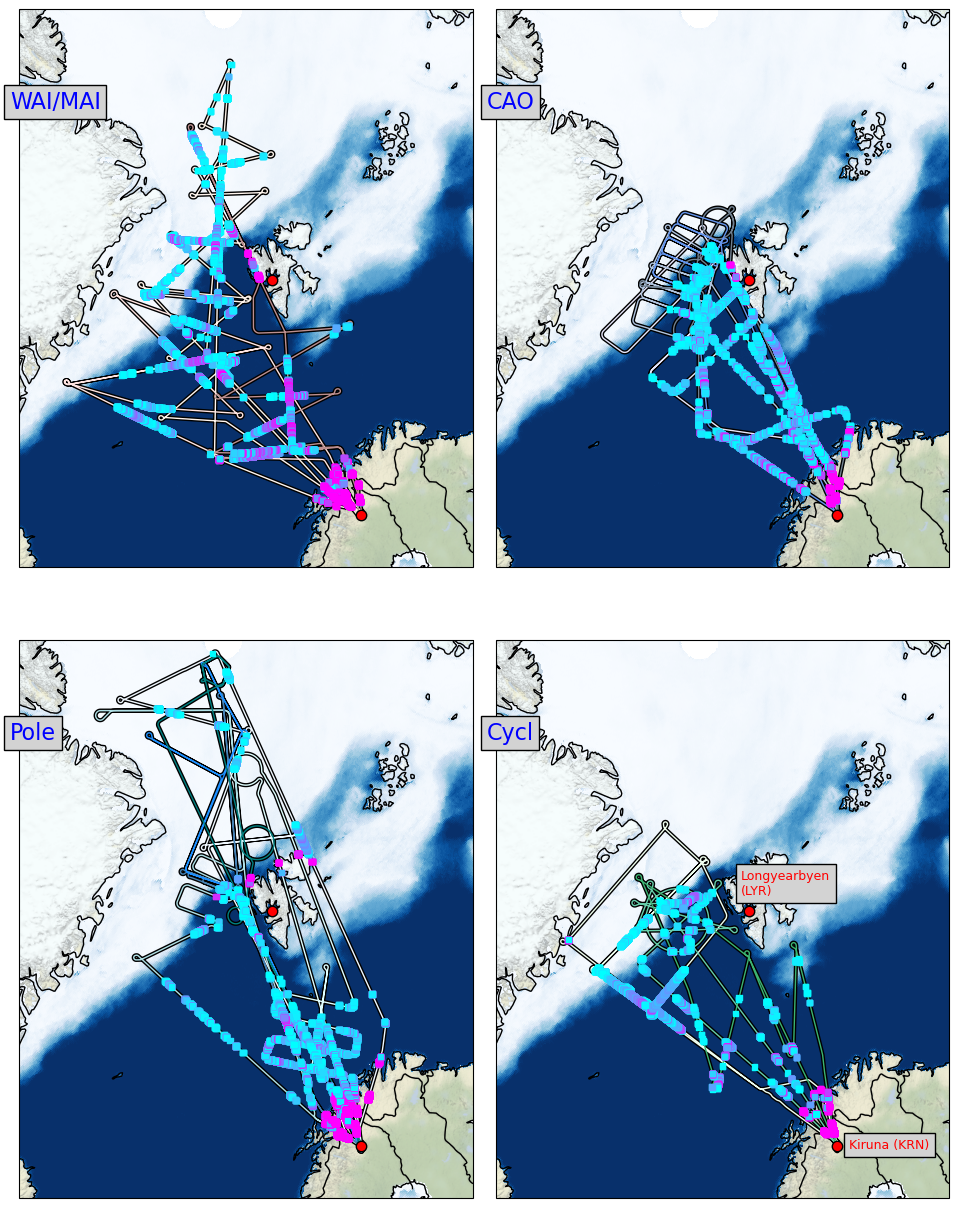

In [9]:
with_halo=True
with_polar=False

manuscript_figure=True
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatch
from matplotlib.image import imread
    
import cartopy
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt

matplotlib.rcParams.update({"font.size":24})
orig_map = plt.cm.get_cmap('Blues') # getting the original colormap using cm.get_cmap() function
reversed_map = orig_map.reversed()  # reversing the original colormap using reversed() function
                                            # normally the actual bahamas file is used from HALO-(AC)3. However,
                                            # this is not feasible now for testing


halo_ac3_days={"RF01":"20220311",
               "RF02":"20220312",
               "RF03":"20220313",
               "RF04":"20220314",
               "RF05":"20220315",
               "RF06":"20220316",
               "RF07":"20220320",
               "RF08":"20220321",
               "RF09":"20220328",
               "RF10":"20220329",
               "RF11":"20220330",
               "RF12":"20220401",
               "RF13":"20220404",
               "RF14":"20220407",
               "RF15":"20220408",
               "RF16":"20220410",
               "RF17":"20220411",
               "RF18":"20220412"}

y_box=[73.5,74,82,81.,73.5]
x_box=[-12,16,25,-28,-12]

llcrnlat = 76
llcrnlon = -5
urcrnlat = 82
urcrnlon = 15
extent =  [llcrnlon-7.0, urcrnlon, llcrnlat-3, urcrnlat]
big_extent=[llcrnlon-10,urcrnlon+15,llcrnlat-11,90]
coordinates= dict(EDMO=(11.28, 48.08), 
                  Kiruna=(20.336, 67.821),
                  Longyearbyen=(15.46, 78.25),
                  Meiningen=(10.38, 50.56),
                  Lerwick=(-1.18, 60.13),
                  Ittoqqortoormiit=(-21.95, 70.48),
                  Tasiilaq=(-37.63, 65.60))

x1,y1 = coordinates["Kiruna"]   
x2, y2 =coordinates["Longyearbyen"]
# Create a Stamen terrain background instance.
stamen_terrain = cimgt.Stamen('terrain-background')
#Create a GeoAxes in the tile's projection.
x=np.linspace(-90,90,41)
y=np.linspace(55,90,93)
x_grid,y_grid=np.meshgrid(x,y)
white_overlay= np.zeros((41,93))
plt.rcdefaults()


iops=["WAI/MAI","CAO","Pole","Cycl"]
iops_flight_colors={"WAI/MAI":["seashell","linen","mistyrose","rosybrown"],
                    "CAO":["lavender","lightsteelblue","slategrey","cornflowerblue"],
                    "Pole":["aliceblue","lightcyan","powderblue",
                            "steelblue","dodgerblue","teal"],
                    "Cycl":["honeydew","mediumaquamarine","mediumseagreen"]}
iop_flights={"WAI/MAI":["RF02","RF03","RF05","RF06"],
             "CAO":["RF08","RF09",
                    "RF11","RF12"],
             "Pole":["RF04","RF10","RF13",
                     "RF14","RF17","RF18"],
             "Cycl":["RF07","RF15","RF16"]}
fig = plt.figure()
fig, axes = plt.subplots(2,2, figsize=(12,16), subplot_kw={"projection": ccrs.NorthPolarStereo(central_longitude=5)})

#y_box=[73.5,74,82,81.,73.5]
#x_box=[-12,16,25,-28,-12]

    
for int_n, ax in enumerate(axes.flatten()):
    iop=iops[int_n]
    print(iop)
    ax.set_extent(big_extent, crs=ccrs.Geodetic())
    ax.add_image(stamen_terrain, 4)
    ax.contourf(x_grid,y_grid,white_overlay.T,cmap="Greys",vmin=0,vmax=1,transform=ccrs.PlateCarree(),alpha=0.4)

    ax.coastlines(resolution="50m")
    ax.add_feature(cartopy.feature.BORDERS)

    #gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, 
    #                      x_inline=False, lw=0.5, ls="-.",y_inline=False)
    if int_n==3:
        ax.text(x1 + 1.2, y1 - 0.2, "Kiruna (KRN)", fontsize=9,
         transform=ccrs.PlateCarree(),color="red",
         bbox=dict(facecolor='lightgrey',edgecolor="black"))
        ax.text(x2 -1, y2 + 0.75, "Longyearbyen\n(LYR)", fontsize=9,
         transform=ccrs.PlateCarree(),color="red",
         bbox=dict(facecolor='lightgrey',edgecolor="black"))

    ax.plot(x1, y1, '.r', markersize=15,markeredgecolor="k",transform=ccrs.PlateCarree(),zorder=20)
    ax.plot(x2, y2, '.r', markersize=15,markeredgecolor="k",transform=ccrs.PlateCarree(),zorder=20)
    
    # Add relevant HALO flights
    for f,flight in enumerate(iop_flights[iop]):
        day=halo_ac3_days[flight]
        print(day)
        BAHAMAS_cls.cfg_dict["flight_date_used"]=day
        RADAR_cls.cfg_dict["Flight_Dates_used"]={day:flight}
        BAHAMAS_cls.open_bahamas_data()
        radar_ds=RADAR_cls.open_version_specific_processed_radar_data()
        radar_dbz_df=pd.DataFrame(data=np.array(radar_ds["dBZg"][:]),
                                columns=np.array(radar_ds["height"][:]),
                                index=pd.DatetimeIndex(np.array(radar_ds["time"][:])))
                                  
        radar_flag_df=pd.DataFrame(data=np.array(radar_ds["radar_flag"][:]),
                                columns=np.array(radar_ds["height"][:]),
                                index=pd.DatetimeIndex(np.array(radar_ds["time"][:])))

        ocean_index=radar_flag_df[radar_flag_df.loc[:,0]>=0.0].index
        
        high_dBZ_df=pd.DataFrame(data=np.nan,columns=["lat","lon","max_dbz"],
                                 index=pd.DatetimeIndex(np.array(radar_ds.time[:])))
        high_dBZ_df["lat"]     = np.array(radar_ds["lat"].values[:])
        high_dBZ_df["lon"]     = np.array(radar_ds["lon"].values[:])
        high_dBZ_df["max_dbz"] = np.array(radar_ds["dBZg"][:,6::].max(axis=1))
        high_dBZ_df            = high_dBZ_df.loc[ocean_index]
        high_dBZ_df=high_dBZ_df.loc[high_dBZ_df["max_dbz"]>15]
        
        #if f==2:
        #    break
        bahamas=BAHAMAS_cls.bahamas_ds
        lon, lat, altitude, times = bahamas["IRS_LON"], \
                                        bahamas["IRS_LAT"],\
                                            bahamas["IRS_ALT"],\
                                                bahamas["TIME"]        
        ax.plot(lon,lat,color="black",lw=3,transform=ccrs.PlateCarree(),alpha=1.0,zorder=5)
        ax.plot(lon,lat,color=iops_flight_colors[iop][f],lw=1,transform=ccrs.PlateCarree(),alpha=1.0,zorder=10)
        ax.scatter(high_dBZ_df["lon"],high_dBZ_df["lat"],c=high_dBZ_df["max_dbz"],marker="s",s=15,
                   cmap="cool",vmin=15,vmax=30,
                   transform=ccrs.PlateCarree(),zorder=20)
    ax.text(-60, 80, iop, fontsize=16,
         transform=ccrs.PlateCarree(),color="b",
            bbox=dict(facecolor='lightgrey',edgecolor="black"))
    # Plot sea-ice concentration
    ax.pcolormesh(sea_ice.lon,
               sea_ice.lat,
               np.array(sea_ice[:]), 
               transform=ccrs.PlateCarree(),
                   cmap=reversed_map)
fig.subplots_adjust(hspace=0.05,wspace=0.05)
plot_path=notebook_path+"/../plots/"
if manuscript_figure:
    plot_path=manuscript_path
if not os.path.exists(plot_path):
    os.makedirs(plot_path)
fig_name="Fig01_Flight_overviews.png"

fig.savefig(plot_path+fig_name,dpi=300,bbox_inches="tight")
print("Figure saved as:",plot_path+fig_name)

In [8]:
#radar_ds

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])